# What Are The Most  Important to Developers Other Than Base Salary?

This program is to solve the **Business Questions** below
   * To developers, what are the most **important** benifit other than base salary ?
   * If some of the individuals might have bias towards their own **degrees** ?
   * If some of the individuals might have bias towards their **gender** ?
   

Data Understanding
 *  **ImportantBenefits** Column

Import libraties and and show the top five datesets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import HowToBreakIntoTheField as t
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This function `get_description` is to get the column's description

In [3]:
def get_description(column_name, schema=schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc

#test your code
#Check your function against solution - you shouldn't need to change any of the below code
get_description(df.columns[0]) # This should return a string of the first column description

'Respondent ID number'

In [4]:
#Check your function against solution - you shouldn't need to change any of the below code
descrips = set(get_description(col) for col in df.columns)
#t.check_description(descrips)

In [5]:
get_description('ImportantBenefits')

'When it comes to compensation and benefits, other than base salary, which of the following are most important to you?'

## 1 The most important benifit

These codes below show the top the most important benifits are **Vacation/days off**，**emote options**
 and **Health benefits**

In [6]:
#get ImportantBenrfits value counts
impobf_vals=df.ImportantBenefits.value_counts()


Clean the data and plot the important benifit

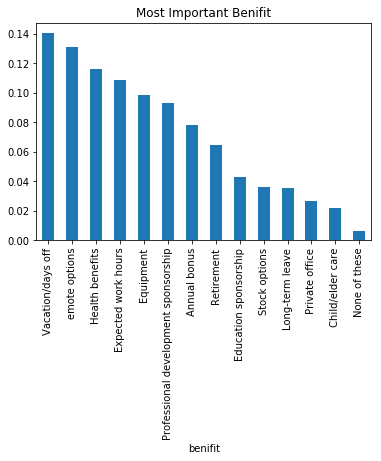

In [7]:
possible_vals = ["Stock options", "Retirement","Annual bonus", 
                 "Vacation/days off", "Charitablet-upse match","Health benefits",
                 "Equipment", " Private office", "Professional development sponsorship",
                 "Education sponsorship", "Long-term leave","Expected work hours",
                 "emote options", " Child/elder care", "None of these"]

def clean_and_plot(df, title='Most Important Benifit', plot=True):
    '''
    INPUT 
        df - a dataframe holding the ImportantBenefits column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the ImportantBenefits column.
    '''
    study = df['ImportantBenefits'].value_counts().reset_index()
    study.rename(columns={'index': 'benifit', 'ImportantBenefits': 'count'}, inplace=True)
    study_df = t.total_count(study, 'benifit', 'count', possible_vals)

    study_df.set_index('benifit', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)# plot the clean data and show the most important benifit

## 2 Degees Influence 

These codes below show the influence of **degrees** on result.

Determine if the data is higher degree

In [8]:
def higher_ed(formal_ed_str):
    '''
    INPUT
        formal_ed_str - a string of one of the values from the Formal Education column
    
    OUTPUT
        return 1 if the string is  in ("Master's degree", "Doctoral", "Professional degree")
        return 0 otherwise
    
    '''
    if formal_ed_str in ("Master's degree", "Doctoral", "Professional degree"):
        return 1
    else:
        return 0
    

#df["FormalEducation"].apply(higher_ed)[:5] #Test your function to assure it provides 1 and 0 values for the df

Get percent of Higher Education

In [9]:
# Check your code here
df['HigherEd'] = df["FormalEducation"].apply(higher_ed)
higher_ed_perc = df['HigherEd'].mean()
t.higher_ed_test(higher_ed_perc)

Nice job!  That's right.  The percentage of individuals in these three groups is 0.23069738480697385.


Get Higher Education rows and Lower Educationv Rows

In [10]:
ed_1 = df[df['HigherEd'] == 1] # Subset df to only those with HigherEd of 1
ed_0 = df[df['HigherEd'] == 0] # Subset df to only those with HigherEd of 0


#print(ed_1['HigherEd'][:5]) #Assure it looks like what you would expect
#print(ed_0['HigherEd'][:5]) #Assure it looks like what you would expect

These **form** below show for **Higher and Lower Educition** the top 3 most important benifits are all Vacation/days off，emote optionsand Health benefits

This **form** shows the difference of Higher and Lower Education

_Higher_ **Bigger** than _Lower_ is
* Vacation/days off
* Professional development sponsorship
* Stock options

_Higher_ **Smaller** than _Lower_ is
* Health benefits
* Equipment
* PEducation sponsorship

To show the Diff between Higher(ed_1_perc) and Low(ed_0_perc) Education

In [11]:
#To show the Diff between Higher(ed_1_perc) and Low(ed_0_perc) Education
ed_1_perc = clean_and_plot(ed_1, 'Higher Formal Education', plot=False)
ed_0_perc = clean_and_plot(ed_0, 'Max of Bachelors Higher Ed', plot=False)

comp_df = pd.merge(ed_1_perc, ed_0_perc, left_index=True, right_index=True)
comp_df.columns = ['ed_1_perc', 'ed_0_perc']
comp_df['Diff_HigherEd_Vals'] = comp_df['ed_1_perc'] - comp_df['ed_0_perc']
comp_df.style.bar(subset=['Diff_HigherEd_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,ed_1_perc,ed_0_perc,Diff_HigherEd_Vals
benifit,,,
Vacation/days off,0.146161,0.138516,0.00764568
emote options,0.131766,0.131019,0.000747026
Health benefits,0.110605,0.117655,-0.0070504
Expected work hours,0.109638,0.108742,0.000895809
Professional development sponsorship,0.0968655,0.0918752,0.00499031
Equipment,0.0923088,0.10065,-0.0083408
Annual bonus,0.0796396,0.0772335,0.00240608
Retirement,0.0627934,0.0653817,-0.00258832
Stock options,0.0393883,0.0350122,0.00437604


## 3 Gender Infuluence 

These codes below show the influence of **Gender** on result.

In [17]:
get_description('Gender')#get the description of Gender
gender_vals=df.Gender.value_counts()#get the gender value_counts

The function of `male`

In [18]:
def male(gender_str):
    '''
    INPUT
        ender_str - a string of one of the values from the Gender column
    
    OUTPUT
        return 1 if the string is "Male"
        return 0 otherwise
    
    '''
    if gender_str=="Male":
        return 1
    else:
        return 0


The function of `female`

In [19]:
def female(gender_str):
    '''
    INPUT
        gender_str - a string of one of the values from the he Formal  column
    
    OUTPUT
        returnfe 1 if the string is "Female"
        return 0 otherwise
    
    '''
    if gender_str=="Female":
        return 1
    else:
        return 0    


Get df['male']

In [20]:
# Get df['male']
df['male'] = df["Gender"].apply(male)
#male_perc =df['male'].mean()
#print(male_perc)

Get df['female']

In [21]:
# Get df['female']
df['female'] = df["Gender"].apply(female)
#female_perc =df['female'].mean()
#female_perc

In [22]:
male_df = df[df['male'] == 1] # Subset df to only those with Maleof 1
female_df = df[df['female'] == 1] # Subset df to only those with Female of 1
#print(male_df['male'][:5]) #Assure it looks like what you would expect
#print(female_df['male'][:5]) #Assure it looks like what you would expect

In [23]:
# Male DataFrame
male_perc = clean_and_plot(male_df, 'Male', plot=False)
# Fmale DataFrame
female_perc = clean_and_plot(female_df, 'Female', plot=False)
# Merge Male and Female DataFrame
comp_df = pd.merge(male_perc, female_perc, left_index=True, right_index=True)
comp_df.columns = ['male_perc', 'female_perc']
#Calculate the diff
comp_df['Diff_Gender_Vals'] = comp_df['male_perc'] - comp_df['female_perc']
#Shou the bar
comp_df.style.bar(subset=['Diff_Gender_Vals'], align='mid', color=['#d65f5f', '#5fba7d'])

,male_perc,female_perc,Diff_Gender_Vals
benifit,,,
Vacation/days off,0.14062,0.155683,-0.0150632
emote options,0.132211,0.131219,0.000992195
Health benefits,0.113423,0.128526,-0.0151031
Expected work hours,0.110151,0.116001,-0.0058501
Equipment,0.103837,0.0678918,0.0359449
Professional development sponsorship,0.093948,0.10055,-0.00660218
Annual bonus,0.0780052,0.0650825,0.0129226
Retirement,0.0646882,0.0699988,-0.0053106
Education sponsorship,0.0412117,0.0475243,-0.00631264
